In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import scipy.cluster.hierarchy as sch
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler

#### **``` 💡This code performs a correlation analysis for the numerical columns from filtered data and then visualizes the results using a triangular heatmap of Spearman correlation. Here is a detailed description of the steps performed by the code:```**

**1. Importing necessary libraries:**

>`
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
from pathlib import Path  
`

🔸 It imports the pandas library, which is used for data manipulation, and the Path module from the pathlib library, which helps with file path operations.

**2. Determining the current file path and the parent directory path:**

>`
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent
`

🔸current_file_path retrieves the full path to the current script

🔸parent_directory_path goes two levels up in the directory structure to get the path to the parent directory.

**3. Defining the input file path:**

>`
input_file_path = parent_directory_path / "data" / "03_Processed" / "03_Filtered_Selected_Features.csv"
`

🔸 Constructs the path to the "03_Filtered_Selected_Features.csv" file in the "03_Processed" directory within the "data" directory.

**4. Loading filtered data from the CSV file:**

>`
data_filtered = pd.read_csv(input_file_path)
`

🔸Loads the data from the CSV file specified by input_file_path into the variable data_filtered.

**5. Selecting numerical columns for correlation analysis:**

>`
numerical_data = data_filtered.select_dtypes(include=['number'])
`

🔸Selects all columns of numerical type from data_filtered and stores them in numerical_data.


**6. Creating a triangular heatmap of Spearman correlation:**

Calculating the correlation matrix:
>`
correlation_matrix = numerical_data.corr(method="spearman")
`

🔸Computes the Spearman correlation matrix for the numerical columns

Masking the upper triangle of the correlation matrix:
>`
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
`

🔸Creates a mask to hide the upper triangular part of the correlation matrix to avoid duplicates.

Plotting the heatmap:
>`
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": .75})
plt.title('Triangular Heatmap of Spearman Correlation of Numerical Variables', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()
`

🔸Creates a mask to hide the upper triangular part of the correlation matrix to avoid duplicates.

**7. Creating and displaying the triangular heatmap of correlations:**

>`
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": .75})
plt.title('Triangular heatmap of correlation between numerical variables', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()
`

🔸The code generates a Spearman correlation heatmap for filtered numerical data from a CSV file, adjusting visual settings for clarity and aesthetics before displaying the plot.



#### **``` 💡 In summary, the code loads filtered data, selects numerical columns, calculates the Spearman correlation between them, masks the upper triangular part of the correlation matrix, creates, and displays a triangular heatmap of these correlations.```**


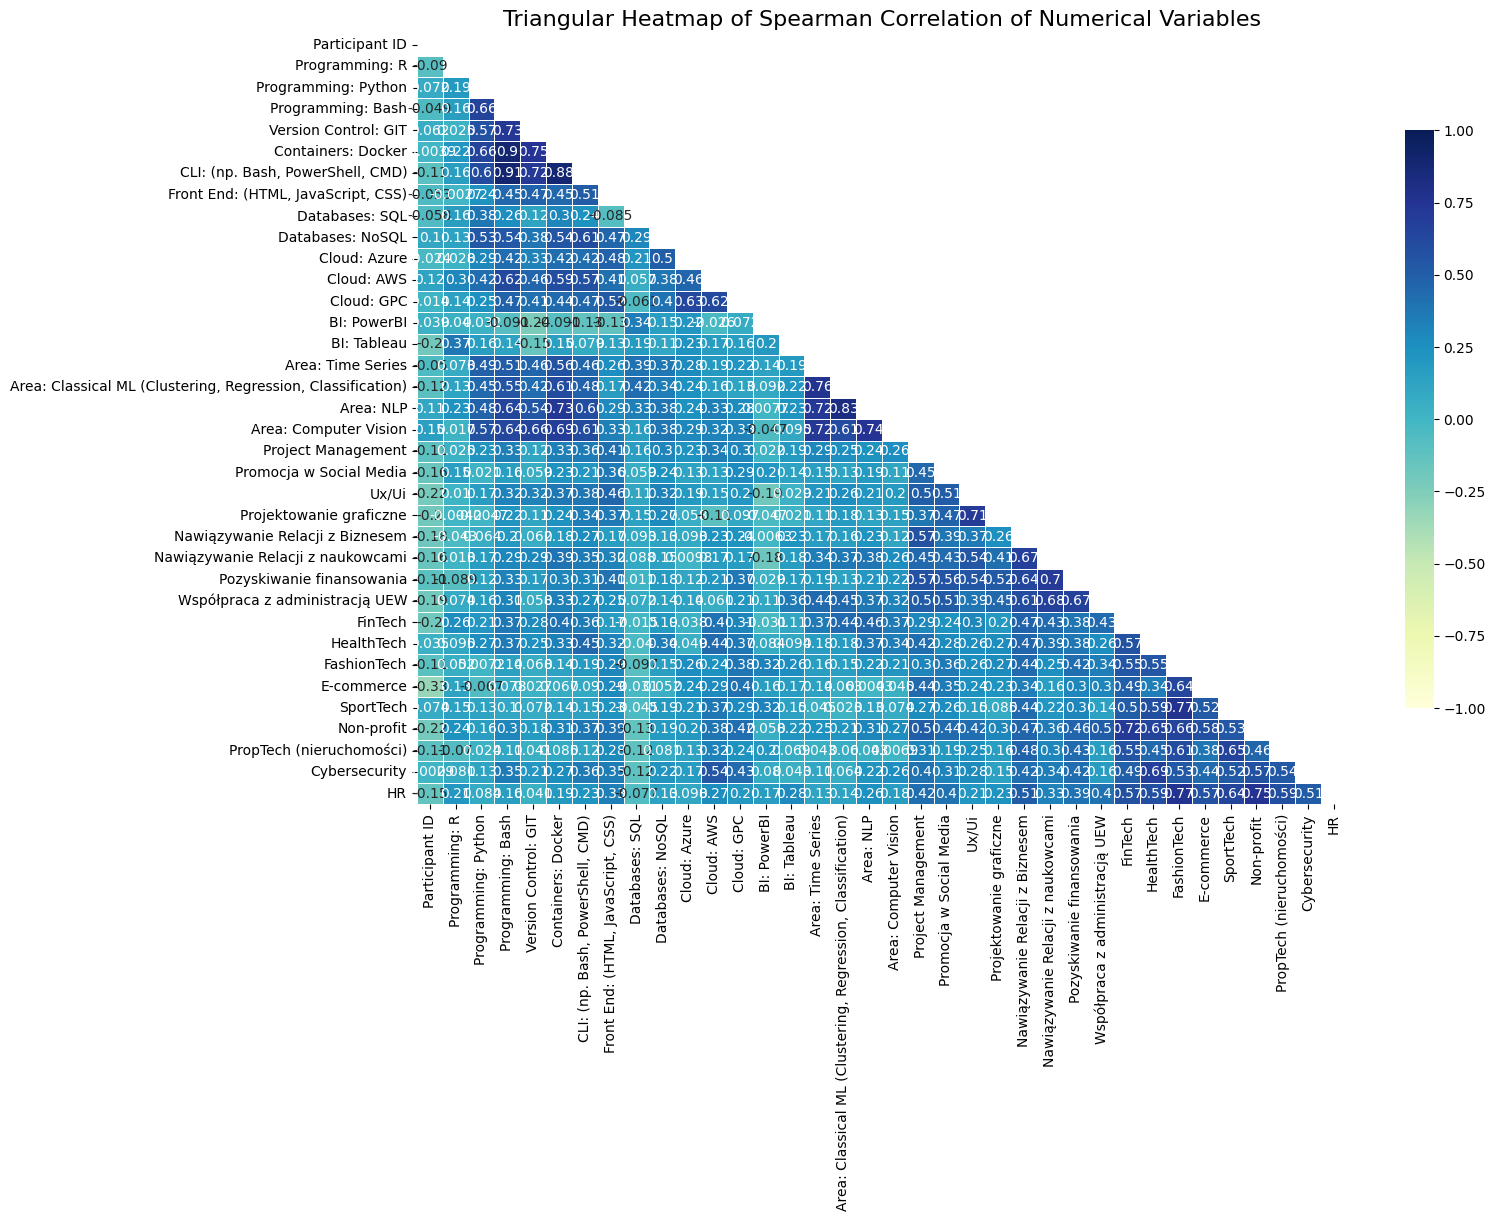

In [8]:
input_file_path = r"C:\Users\xbots\Projekt-people-analytics\data\03_Processed\03_Filtered_Selected_Features.csv"

# Load the filtered data from the CSV file
data_filtered = pd.read_csv(input_file_path)

# Select numerical columns for correlation analysis
numerical_data = data_filtered.select_dtypes(include=['number'])

# Create a triangular heatmap of Spearman correlation
correlation_matrix = numerical_data.corr(method="spearman")

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": .75})
plt.title('Triangular Heatmap of Spearman Correlation of Numerical Variables', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### **``` This heatmap shows the Spearman correlation coefficients between various skills. Key points include:```**

**High Correlation Clusters:
Programming skills (Python, R, Bash) are highly correlated with each other.
Cloud services (Azure, AWS) show a moderate correlation.
Database skills (SQL, NoSQL) and programming skills also have some degree of correlation.**

**Negative Correlations:
Some skills like "Nawiązywanie Relacji z Biznesem" (Building Relationships with Business) and technical skills like "Programming: Python" show negative correlations, indicating an inverse relationship.**

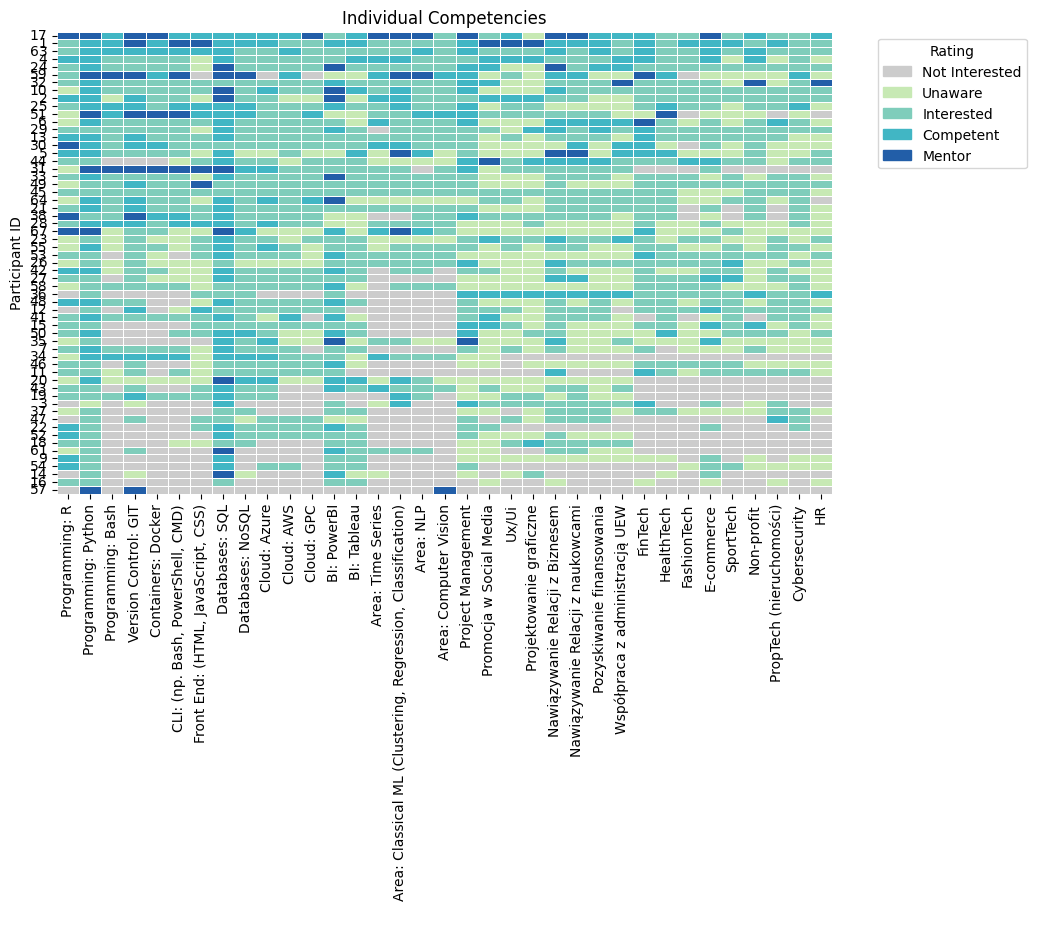

In [9]:

# Specify columns to exclude from the data
columns_to_exclude = [
    "Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:", 
    "Jeżeli pominięto branżę, na której się znasz dopisz ją:", 
    "Community Participation"
]

# Drop the specified columns
selected_data = data_filtered.drop(columns=columns_to_exclude)

# Set 'Participant ID' as the index
selected_data.set_index('Participant ID', inplace=True)

# Calculate the sum of each row and sort the data by this sum in descending order
selected_data['Sum'] = selected_data.sum(axis=1)
selected_data = selected_data.sort_values(by='Sum', ascending=False).drop(columns=['Sum'])

# Define colors and levels for the heatmap
colors = ['#CCCCCC', '#C7E9B4', '#7FCDBB', '#41B6C4', '#225EA8']
levels = [0.0, 1.0, 2.0, 3.0, 4.0]
cmap = ListedColormap(colors)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(selected_data, cmap=cmap, vmin=0.0, vmax=4.0, annot=False, fmt=".1f", cbar=False, linewidths=.5, linecolor='#FFFFFF')
plt.title('Individual Competencies')
plt.xlabel(' ')
plt.ylabel('Participant ID')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Create a custom colorbar (legend)
legend_labels = ['Not Interested', 'Unaware', 'Interested', 'Competent', 'Mentor']
legend_patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(handles=legend_patches, title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust y-axis ticks to match the index
plt.yticks(ticks=np.arange(0.5, len(selected_data.index) + 0.5), labels=selected_data.index)

# Display the plot
plt.show()


#### **``` This heatmap shows the competencies of individual participants across various skills. Each cell's color represents the competency level from "Not Interested" to "Mentor":```**

**Skill Distribution:
Participants show varied levels of interest and competence in different areas.
Skills like "Programming: Python" and "Databases: SQL" have more participants marked as "Competent" or "Mentor".
Non-technical skills like "HR" and "Promocja w Social Media" show more "Not Interested" or "Unaware" ratings.**

**Patterns:
Certain participants show high competency across multiple skills, indicating broad expertise.
Others show focused expertise in specific areas, like cloud services or data analysis.**

<Figure size 1400x800 with 0 Axes>

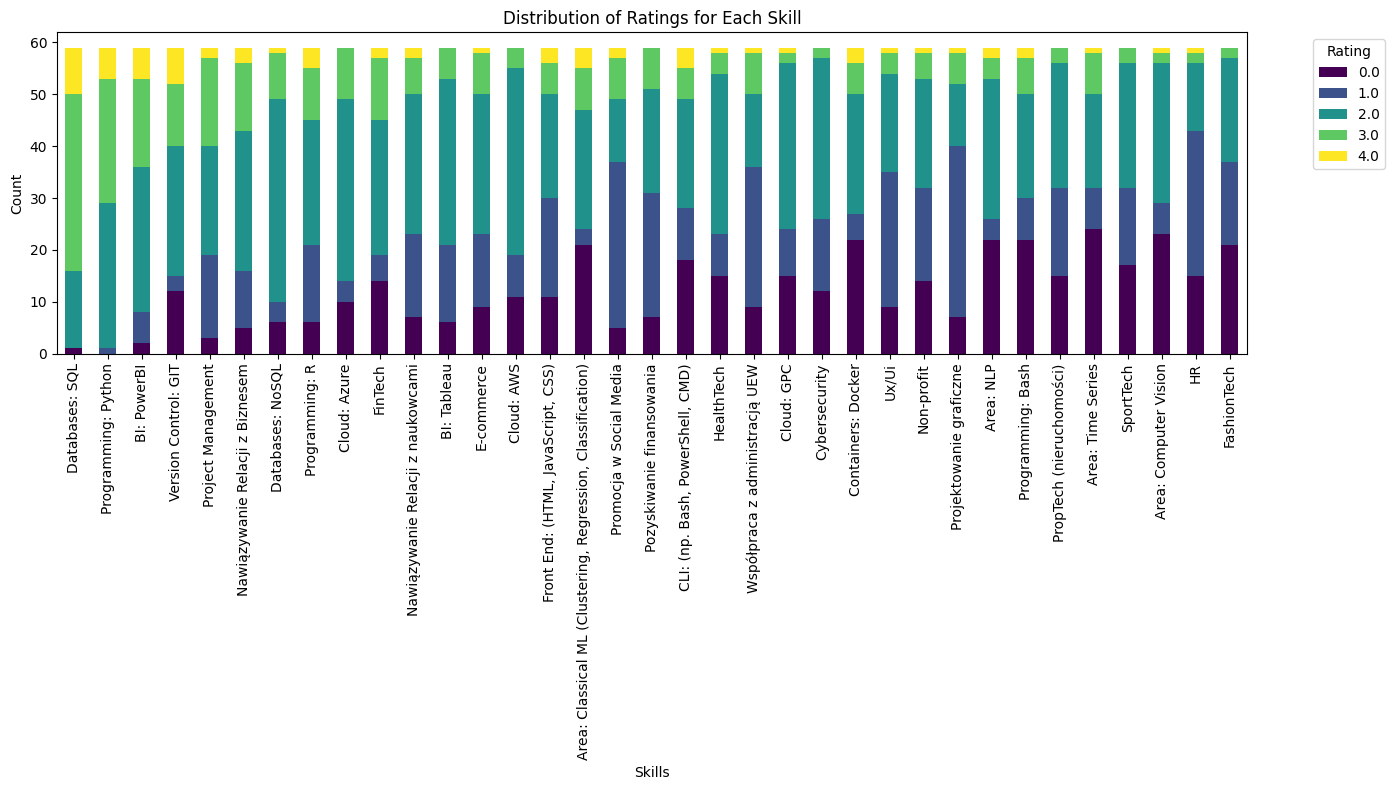

In [10]:

numeric_data = data_filtered.drop(columns=['Participant ID'])

# Calculate the mean rating for each skill
mean_ratings = numeric_data.mean(numeric_only=True)

# Sort the columns by mean rating in descending order
sorted_columns = mean_ratings.sort_values(ascending=False).index
sorted_data = numeric_data[sorted_columns]

# Plot the distribution of ratings for each skill
plt.figure(figsize=(14, 8))

cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, sorted_data.apply(pd.Series.value_counts).shape[0])))
# Create a stacked bar plot
sorted_data.apply(pd.Series.value_counts).fillna(0).sort_index().T.plot(kind='bar', stacked=True, colormap=cmap, figsize=(14, 8))


plt.title('Distribution of Ratings for Each Skill')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and display the plot
plt.show()

#### **``` This bar chart provides a count of participants for each rating (from 0 to 4) across different skills:```**

**General Trends:
Most skills have a balanced distribution of ratings, but some, like "Databases: SQL" and "Programming: Python", show higher counts of "Competent" (3) and "Mentor" (4) ratings.
Less popular skills like "HR" and "FashionTech" have higher counts of lower ratings, indicating lower interest or awareness.**

**Skill Popularity:
Technical skills (databases, programming languages) tend to have higher competency ratings.
Business and niche skills (e.g., "Nawiązywanie Relacji z Biznesem", "PropTech") show a wider spread of ratings, with more participants being "Unaware" or "Not Interested".**